Kirill Komarov, Artur Kozubov 54 Dataset. 50%, 50%.

## Phase 2

### 2.1

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from collections import Counter
from sklearn.model_selection import train_test_split

In [54]:
connections = pd.read_csv(f'./data/connections.csv', delimiter='\t')
connections.info()
connections.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15155 entries, 0 to 15154
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15155 non-null  object 
 1   imei               15155 non-null  int64  
 2   mwra               15155 non-null  float64
 3   c.katana           15155 non-null  float64
 4   c.dogalize         15155 non-null  float64
 5   c.android.youtube  15155 non-null  float64
 6   c.android.chrome   15155 non-null  float64
 7   c.android.gm       15155 non-null  float64
 8   c.raider           15155 non-null  float64
 9   c.UCMobile.x86     15155 non-null  float64
 10  c.updateassist     15155 non-null  float64
 11  c.UCMobile.intl    15155 non-null  float64
 12  c.android.vending  15155 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


,ts,imei,mwra,c.katana,c.dogalize,c.android.youtube,c.android.chrome,c.android.gm,c.raider,c.UCMobile.x86,c.updateassist,c.UCMobile.intl,c.android.vending
0,2018-05-05 10:00:00,8630330696303481172,1.0,9.29393,9.65293,9.18203,7.64836,14.61376,47.82024,54.33564,62.35464,72.81987,11.24912
1,2018-05-05 10:01:00,3590433799317662097,0.0,9.87107,6.65895,10.84119,9.05362,11.03129,35.76535,48.01631,64.58400,9.11802,31.03623
2,2018-05-05 10:02:00,3590433799317661123,0.0,15.31239,5.01324,10.87556,6.65091,13.41425,57.80452,68.35074,23.34476,86.06474,45.28060
3,2018-05-05 10:03:00,8630330696303481909,1.0,8.23151,9.76082,9.77154,9.98477,14.15220,51.48972,87.82917,37.14845,91.60321,64.76852
4,2018-05-05 10:04:00,8630330696303481701,1.0,8.02947,10.25168,6.63390,6.77049,10.60092,30.43476,92.26847,68.27938,89.99798,15.42470


In [55]:
processes = pd.read_csv(f'./data/processes.csv', delimiter='\t')
processes.info()
processes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15155 entries, 0 to 15154
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          15155 non-null  object 
 1   imei                        15155 non-null  int64  
 2   mwra                        15155 non-null  float64
 3   p.system                    15155 non-null  float64
 4   p.android.gm                15155 non-null  float64
 5   p.android.settings          15155 non-null  float64
 6   p.android.chrome            15155 non-null  float64
 7   p.android.packageinstaller  15155 non-null  float64
 8   p.android.documentsui       15155 non-null  float64
 9   p.android.externalstorage   15155 non-null  float64
 10  p.android.vending           15155 non-null  float64
 11  p.olauncher                 15155 non-null  float64
 12  p.android.defcontainer      15155 non-null  float64
 13  p.dogalize                  151

,ts,imei,mwra,p.system,p.android.gm,p.android.settings,p.android.chrome,p.android.packageinstaller,p.android.documentsui,p.android.externalstorage,...,p.dogalize,p.browser.provider,p.notifier,p.gms.persistent,p.inputmethod.latin,p.katana,p.google,p.process.gapps,p.android.gms,p.simulator
0,2018-05-05 10:00:00,8630330696303481172,1.0,10.85162,5.76758,12.23591,13.47511,15.75761,7.84882,10.31012,...,53.39714,48.75442,57.61393,62.34198,54.36855,70.29131,77.50615,81.28121,71.85749,9.12899
1,2018-05-05 10:01:00,3590433799317662097,0.0,11.19103,11.05400,6.73356,9.66098,11.64789,13.19432,7.79902,...,38.19170,43.23944,64.95890,4.65765,58.14930,41.15580,79.63176,92.37950,10.43540,61.58344
2,2018-05-05 10:02:00,3590433799317661123,0.0,10.13556,8.68557,7.66270,9.71330,12.86800,10.82623,6.12165,...,34.04061,73.33044,63.96102,43.23826,48.85930,13.37236,86.74975,88.53951,32.99274,63.99667
3,2018-05-05 10:03:00,8630330696303481909,1.0,7.20268,6.00790,10.73122,10.83178,14.65533,8.63345,12.01726,...,63.82486,34.79186,72.32636,98.03954,99.86546,97.03455,4.55653,75.56993,21.74111,9.71695
4,2018-05-05 10:04:00,8630330696303481701,1.0,9.63418,9.27475,10.71554,15.98658,16.01235,7.17058,11.39136,...,39.13822,52.84187,72.66790,84.47463,50.03377,75.08935,82.13932,23.30607,47.49774,81.93135


In [56]:
connections['ts'] = pd.to_datetime(connections['ts']).astype(np.int64)

In [57]:
processes['ts'] = pd.to_datetime(processes['ts']).astype(np.int64)

In [58]:
df = pd.merge(connections, processes, on=['imei', 'ts', 'mwra'])
df.head()

,ts,imei,mwra,c.katana,c.dogalize,c.android.youtube,c.android.chrome,c.android.gm,c.raider,c.UCMobile.x86,...,p.dogalize,p.browser.provider,p.notifier,p.gms.persistent,p.inputmethod.latin,p.katana,p.google,p.process.gapps,p.android.gms,p.simulator
0,1525514400000000000,8630330696303481172,1.0,9.29393,9.65293,9.18203,7.64836,14.61376,47.82024,54.33564,...,53.39714,48.75442,57.61393,62.34198,54.36855,70.29131,77.50615,81.28121,71.85749,9.12899
1,1525514460000000000,3590433799317662097,0.0,9.87107,6.65895,10.84119,9.05362,11.03129,35.76535,48.01631,...,38.19170,43.23944,64.95890,4.65765,58.14930,41.15580,79.63176,92.37950,10.43540,61.58344
2,1525514520000000000,3590433799317661123,0.0,15.31239,5.01324,10.87556,6.65091,13.41425,57.80452,68.35074,...,34.04061,73.33044,63.96102,43.23826,48.85930,13.37236,86.74975,88.53951,32.99274,63.99667
3,1525514580000000000,8630330696303481909,1.0,8.23151,9.76082,9.77154,9.98477,14.15220,51.48972,87.82917,...,63.82486,34.79186,72.32636,98.03954,99.86546,97.03455,4.55653,75.56993,21.74111,9.71695
4,1525514640000000000,8630330696303481701,1.0,8.02947,10.25168,6.63390,6.77049,10.60092,30.43476,92.26847,...,39.13822,52.84187,72.66790,84.47463,50.03377,75.08935,82.13932,23.30607,47.49774,81.93135


In [59]:
df

,ts,imei,mwra,c.katana,c.dogalize,c.android.youtube,c.android.chrome,c.android.gm,c.raider,c.UCMobile.x86,...,p.dogalize,p.browser.provider,p.notifier,p.gms.persistent,p.inputmethod.latin,p.katana,p.google,p.process.gapps,p.android.gms,p.simulator
0,1525514400000000000,8630330696303481172,1.0,9.29393,9.65293,9.18203,7.64836,14.61376,47.82024,54.33564,...,53.39714,48.75442,57.61393,62.34198,54.36855,70.29131,77.50615,81.28121,71.85749,9.12899
1,1525514460000000000,3590433799317662097,0.0,9.87107,6.65895,10.84119,9.05362,11.03129,35.76535,48.01631,...,38.19170,43.23944,64.95890,4.65765,58.14930,41.15580,79.63176,92.37950,10.43540,61.58344
2,1525514520000000000,3590433799317661123,0.0,15.31239,5.01324,10.87556,6.65091,13.41425,57.80452,68.35074,...,34.04061,73.33044,63.96102,43.23826,48.85930,13.37236,86.74975,88.53951,32.99274,63.99667
3,1525514580000000000,8630330696303481909,1.0,8.23151,9.76082,9.77154,9.98477,14.15220,51.48972,87.82917,...,63.82486,34.79186,72.32636,98.03954,99.86546,97.03455,4.55653,75.56993,21.74111,9.71695
4,1525514640000000000,8630330696303481701,1.0,8.02947,10.25168,6.63390,6.77049,10.60092,30.43476,92.26847,...,39.13822,52.84187,72.66790,84.47463,50.03377,75.08935,82.13932,23.30607,47.49774,81.93135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15510,1526379480000000000,8630330696303482147,1.0,10.56641,14.11005,14.41197,14.18357,10.19200,37.37893,12.61802,...,50.31696,40.92997,87.74093,85.68022,74.24349,31.05734,59.55667,96.39741,64.66882,17.09412
15511,1525862160000000000,359043379931766494,1.0,11.31192,13.64240,12.69253,9.69818,9.21048,62.28946,70.33297,...,53.34673,21.81320,26.58583,0.72731,34.81966,96.04223,21.20380,98.25850,48.48778,28.24355
15512,1525862160000000000,359043379931766494,1.0,11.31192,13.64240,12.69253,9.69818,9.21048,62.28946,70.33297,...,53.34673,21.81320,26.58583,0.72731,34.81966,96.04223,21.20380,98.25850,48.48778,28.24355
15513,1525593540000000000,8630330696303481271,1.0,8.00197,11.48360,10.18327,9.07833,13.24834,43.89161,66.70692,...,54.44092,59.80504,91.44128,41.87333,40.33199,92.19788,25.30395,89.09121,55.55247,7.68633


#### Data cleaning:

Find negative values in the merged dataset:

In [60]:
negative = df.select_dtypes(include=[np.number]) < 0

negatives = negative.any().any()

if negatives:
    print("The dataset negative values:")
    print(negative.any())

else:
    print("No negative values found in the dataset")

No negative values found in the dataset


Find NaN values in the merged dataset:

In [61]:
nan = df.isnull().values.any()

if nan:
    print("The dataset NaN values:")
    print(df.isnull().values)

else:
    print("No NaN values found in the dataset")

No NaN values found in the dataset


Find duplicity values in the merged dataset:

In [62]:
duplicity = df.duplicated().any()

if duplicity:
    print("The dataset duplicity values:")
    print(df[df.duplicated()])

else:
    print("No duplicity values found in the dataset")

The dataset duplicity values:
                        ts                 imei  mwra  c.katana  c.dogalize  \
29     1525516080000000000  8630330696303481412   1.0  12.10416    11.83601   
137    1525522500000000000  3590433799317662287   1.0  10.37263     9.86367   
339    1525534560000000000   863033069630348438   1.0  11.76904    11.50224   
356    1525535520000000000  8630330696303481644   1.0  12.34533    16.75461   
365    1525536000000000000  3590433799317662477   1.0  11.66424    12.12388   
...                    ...                  ...   ...       ...         ...   
15510  1526379480000000000  8630330696303482147   1.0  10.56641    14.11005   
15511  1525862160000000000   359043379931766494   1.0  11.31192    13.64240   
15512  1525862160000000000   359043379931766494   1.0  11.31192    13.64240   
15513  1525593540000000000  8630330696303481271   1.0   8.00197    11.48360   
15514  1525593540000000000  8630330696303481271   1.0   8.00197    11.48360   

       c.android.yout

Drop values which are not helpful for further training:

In [63]:
df.drop('ts', axis=1, inplace=True)
df.drop('imei', axis=1, inplace=True)

### 2.1 B - Data integration

#### Standard Deviation 
- detect outliers by standard deviation which spreads data around the mean
- **3x standard deviations ($\sigma$) from the mean ($\mu$)**

In [64]:
def StandardDevDetection(data, n, columns):
    outliers_inx = []
    lower = 0
    upper = 0

    for column in columns:
        data_mean, data_std = mean(data[column], axis=0), std(data[column], axis=0)
        print('column=', column, 'len=', len(data), 'mean=', data_mean, 'std=', data_std)

        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off
        print('column=', column, 'cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

        outliers = data[(data[column] < lower) | (data[column] > upper)].index
        print('Identified outliers:', len(outliers))

        outliers_inx.extend(outliers)

    outliers_inx = Counter(outliers_inx)
    multiple_outliers = list(k for k, v in outliers_inx.items() if v > n)

    data_uppper = data[data[column] > upper]
    data_lower = data[data[column] < lower]
    print('Total number of outliers is:', data_uppper.shape[0] + data_lower.shape[0])

    return multiple_outliers


columns = df.columns
result = StandardDevDetection(df, 1, columns)

df = df.drop(result, axis=0).reset_index(drop=True)

column= mwra len= 15515 mean= 0.6250725104737351 std= 0.48410419035959307
column= mwra cutoff= 1.4523125710787792 lower= -0.8272400606050441 upper= 2.0773850815525146
Identified outliers: 0
column= c.katana len= 15515 mean= 10.889161591363196 std= 2.44430548884102
column= c.katana cutoff= 7.33291646652306 lower= 3.556245124840136 upper= 18.222078057886257
Identified outliers: 41
column= c.dogalize len= 15515 mean= 10.81725211537222 std= 2.566409001690291
column= c.dogalize cutoff= 7.699227005070874 lower= 3.118025110301346 upper= 18.516479120443094
Identified outliers: 49
column= c.android.youtube len= 15515 mean= 10.903470117305831 std= 2.4980080880662476
column= c.android.youtube cutoff= 7.4940242641987425 lower= 3.409445853107089 upper= 18.397494381504572
Identified outliers: 30
column= c.android.chrome len= 15515 mean= 10.283944853367709 std= 2.722924957896465
column= c.android.chrome cutoff= 8.168774873689395 lower= 2.1151699796783134 upper= 18.452719727057104
Identified outliers:

Show data distribution after cut of outlines:

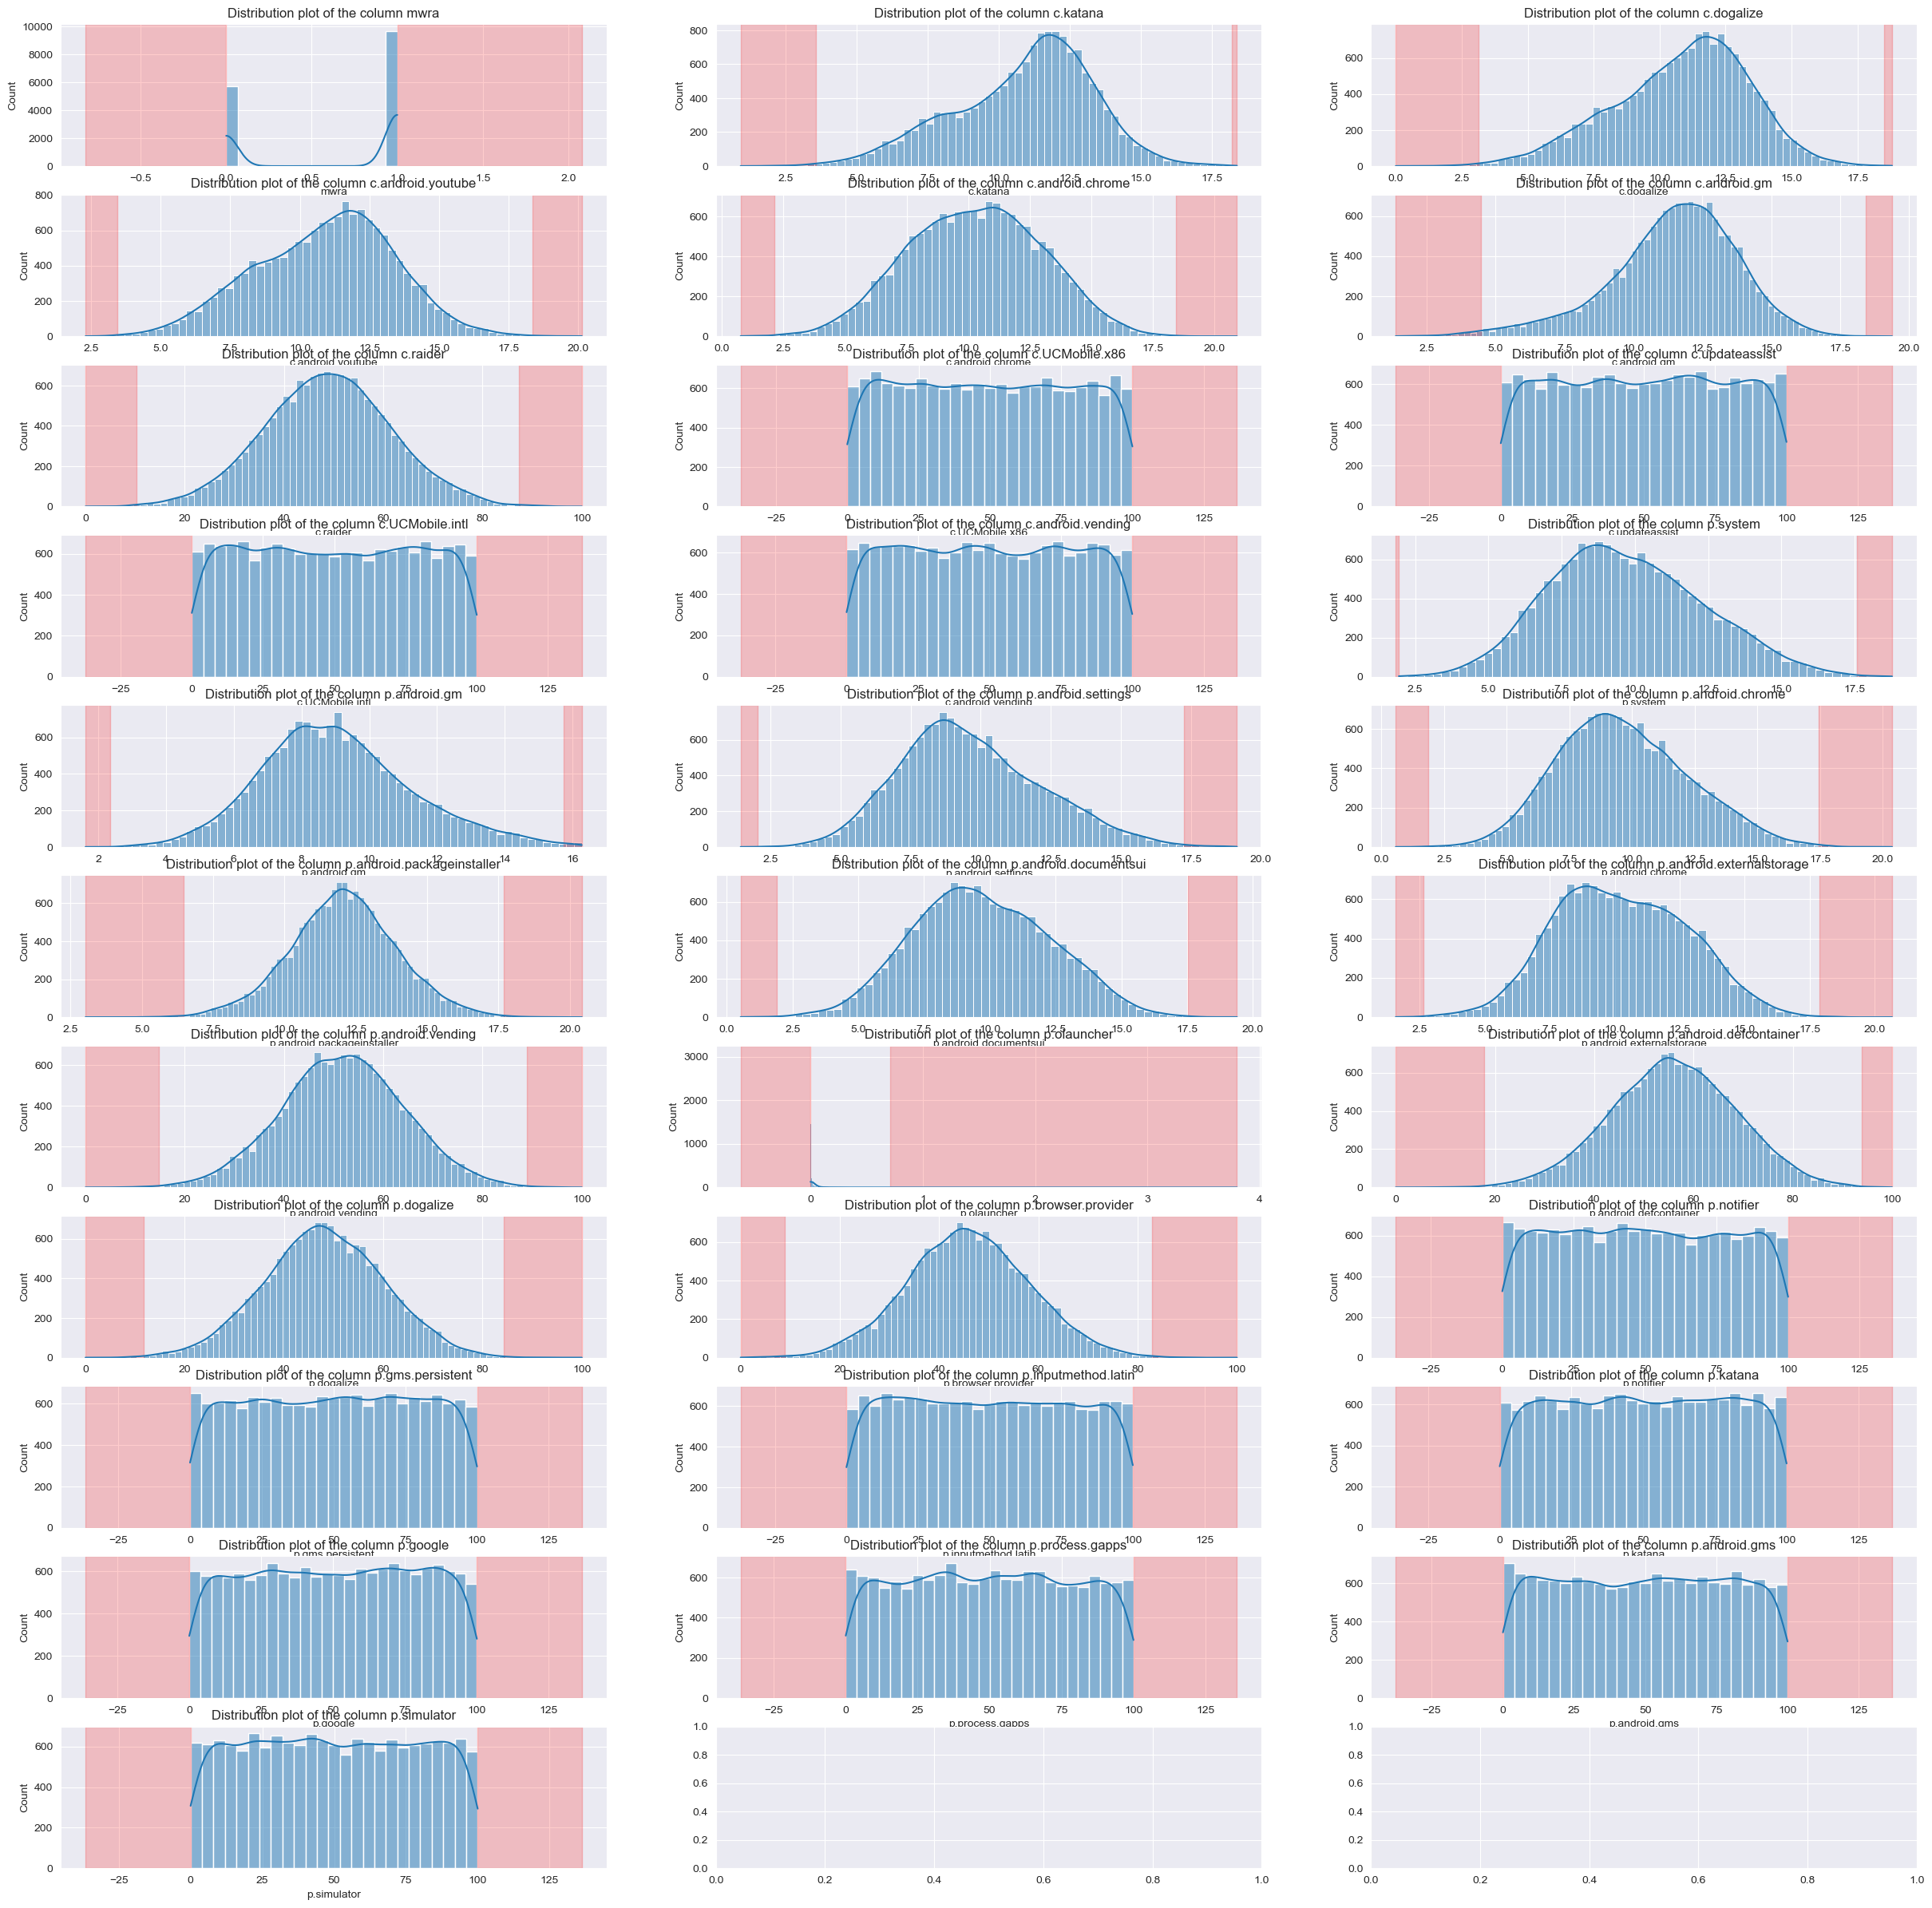

In [65]:
columns = df.columns

fig, axes = plt.subplots(nrows=(len(columns) // 2) - 4, ncols=3, figsize=(30, 30))

axes = axes.flatten()

for i, col in enumerate(columns):
    data_mean, data_std = mean(df[col], axis=0), std(df[col], axis=0)
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].axvspan(xmin=lower, xmax=df[col].min(), alpha=0.2, color='red')
    axes[i].axvspan(xmin=upper, xmax=df[col].max(), alpha=0.2, color='red')
    axes[i].set_title(f'Distribution plot of the column {col}')

### 2.1 A - Split dataset on Train and Test data

In [66]:
df.columns

Index(['mwra', 'c.katana', 'c.dogalize', 'c.android.youtube',
       'c.android.chrome', 'c.android.gm', 'c.raider', 'c.UCMobile.x86',
       'c.updateassist', 'c.UCMobile.intl', 'c.android.vending', 'p.system',
       'p.android.gm', 'p.android.settings', 'p.android.chrome',
       'p.android.packageinstaller', 'p.android.documentsui',
       'p.android.externalstorage', 'p.android.vending', 'p.olauncher',
       'p.android.defcontainer', 'p.dogalize', 'p.browser.provider',
       'p.notifier', 'p.gms.persistent', 'p.inputmethod.latin', 'p.katana',
       'p.google', 'p.process.gapps', 'p.android.gms', 'p.simulator'],
      dtype='object')

In [67]:
target_column = 'mwra'
mwra = df[target_column]
data = df.drop(columns=[target_column], axis=1)
train_data, test_data, train_mwra, test_mwra = train_test_split(data, mwra, test_size=0.3, random_state=42)


### 2.1 B Data transformation

#### Binary Encoding

In [68]:
import category_encoders as ce


def binary_encoding(df_b):
    # create an object of BinaryEncoder
    ce_binary = ce.BinaryEncoder(cols=['mwra'])

    # fit and transform, and you will get the encoded data
    ce_binary.fit_transform(df_b)
    return df_b

In [69]:
train_mwra = binary_encoding(train_mwra)

#### 2.1 C

#### Scaling

#### Data normalization

## $x_{normalization}=\frac{x-x_{min}}{x_{max} - x_{min}}$

In [70]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler


def normalization(df_n):
    # define min max scaler
    scaler = MinMaxScaler()

    # transform data
    df_n = scaler.fit_transform(df_n)
    return df_n

In [71]:
train_data = normalization(train_data)

#### Data standardization

## $x_{standardized} = \frac{x -\mu}{\sigma}$

In [72]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler


def standardization(df_s):
    # define standard scaler
    scaler = StandardScaler()

    # transform data
    df_s = scaler.fit_transform(df_s)
    return df_s

In [73]:
train_data = standardization(train_data)

### Data Transformation

### Make data distribution more Gaussian

- Replacing the data with the log, square root, or inverse to remove skew
- Yeo-Johnson transform (default): works with positive and negative values
- Box-Cox transform: only works with strictly positive values
- λ = −1.0 is a reciprocal transform.
- λ = −0.5 is a reciprocal square root transform.  
- λ = 0.0 is a log transform.
- λ = 0.5 is a square root transform.
- λ = 1.0 is no transform.

array([[<Axes: title={'center': 'c.UCMobile.intl'}>,
        <Axes: title={'center': 'c.UCMobile.x86'}>,
        <Axes: title={'center': 'c.android.chrome'}>,
        <Axes: title={'center': 'c.android.gm'}>,
        <Axes: title={'center': 'c.android.vending'}>],
       [<Axes: title={'center': 'c.android.youtube'}>,
        <Axes: title={'center': 'c.dogalize'}>,
        <Axes: title={'center': 'c.katana'}>,
        <Axes: title={'center': 'c.raider'}>,
        <Axes: title={'center': 'c.updateassist'}>],
       [<Axes: title={'center': 'p.android.chrome'}>,
        <Axes: title={'center': 'p.android.defcontainer'}>,
        <Axes: title={'center': 'p.android.documentsui'}>,
        <Axes: title={'center': 'p.android.externalstorage'}>,
        <Axes: title={'center': 'p.android.gm'}>],
       [<Axes: title={'center': 'p.android.gms'}>,
        <Axes: title={'center': 'p.android.packageinstaller'}>,
        <Axes: title={'center': 'p.android.settings'}>,
        <Axes: title={'center

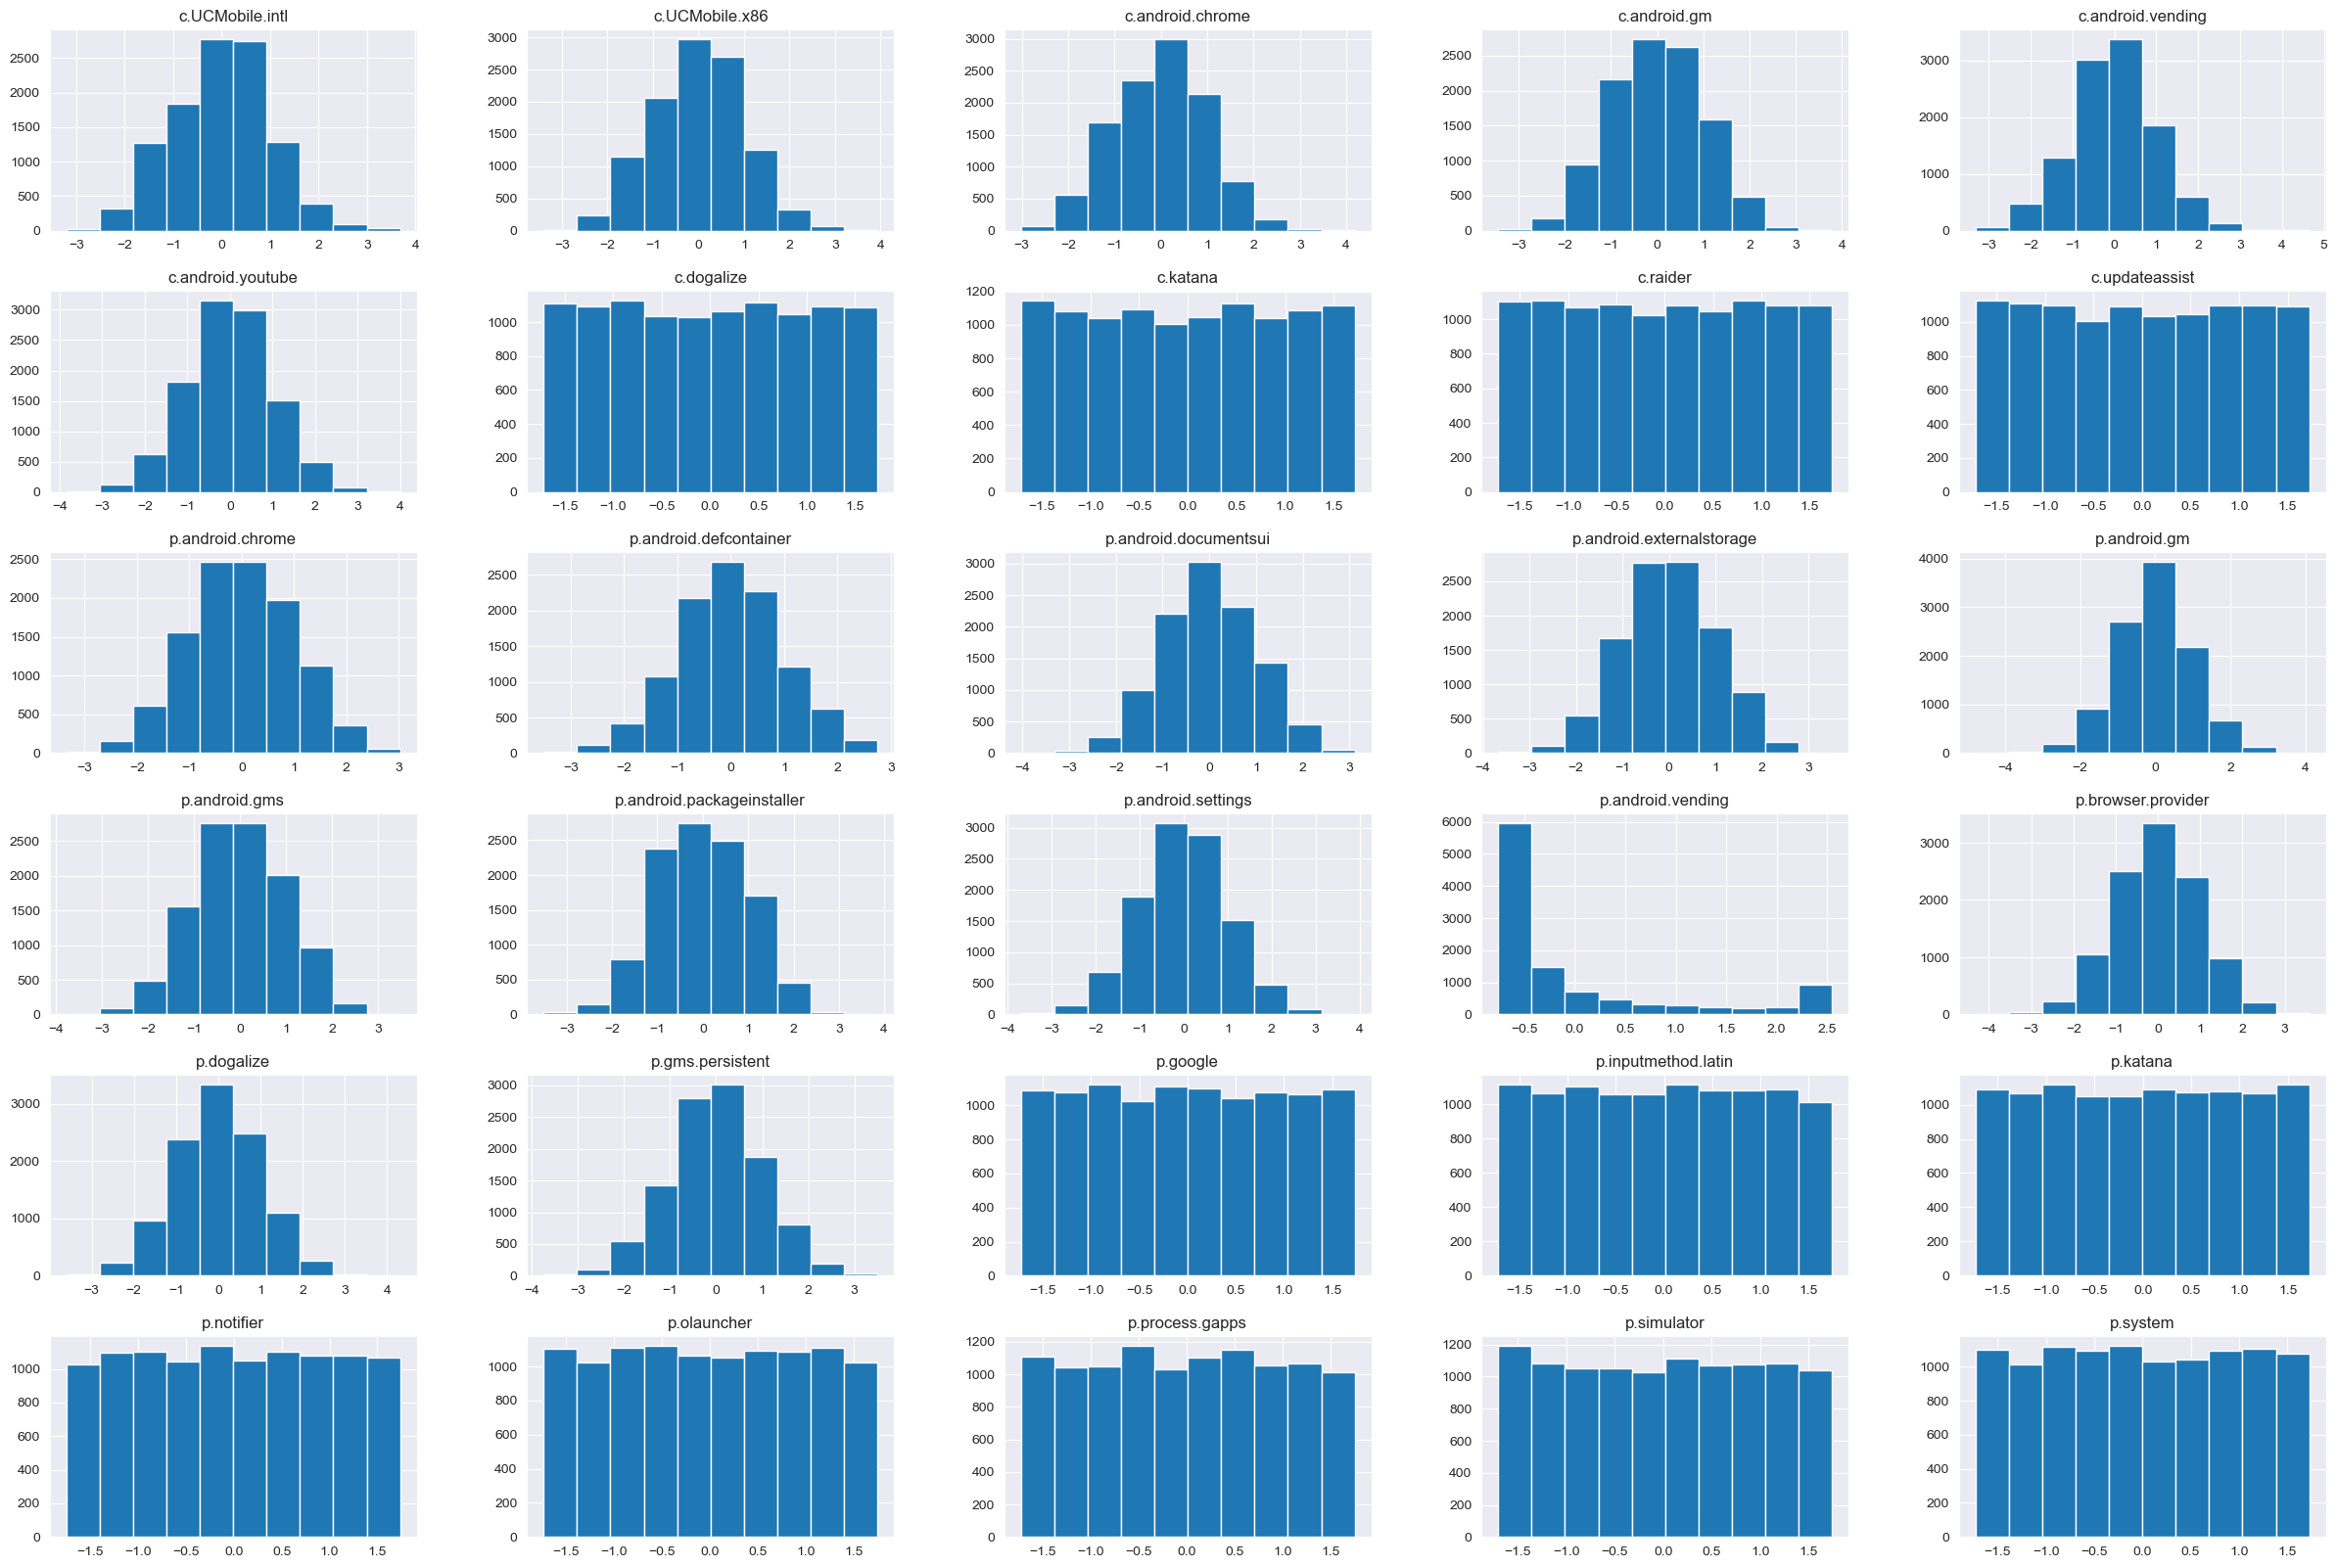

In [74]:
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer

plt.rcParams['figure.figsize'] = [30, 20]

# perform a yeo-johnson transform of the dataset 
pt = PowerTransformer(method='yeo-johnson')
train_data = pt.fit_transform(train_data)

# convert the array back to a dataframe
columns = columns.difference(['mwra'])
train_data = DataFrame(train_data, columns=columns)

# histograms of the variables
train_data.hist()

### RobustScaler

array([[<Axes: title={'center': 'c.UCMobile.intl'}>,
        <Axes: title={'center': 'c.UCMobile.x86'}>,
        <Axes: title={'center': 'c.android.chrome'}>,
        <Axes: title={'center': 'c.android.gm'}>,
        <Axes: title={'center': 'c.android.vending'}>],
       [<Axes: title={'center': 'c.android.youtube'}>,
        <Axes: title={'center': 'c.dogalize'}>,
        <Axes: title={'center': 'c.katana'}>,
        <Axes: title={'center': 'c.raider'}>,
        <Axes: title={'center': 'c.updateassist'}>],
       [<Axes: title={'center': 'p.android.chrome'}>,
        <Axes: title={'center': 'p.android.defcontainer'}>,
        <Axes: title={'center': 'p.android.documentsui'}>,
        <Axes: title={'center': 'p.android.externalstorage'}>,
        <Axes: title={'center': 'p.android.gm'}>],
       [<Axes: title={'center': 'p.android.gms'}>,
        <Axes: title={'center': 'p.android.packageinstaller'}>,
        <Axes: title={'center': 'p.android.settings'}>,
        <Axes: title={'center

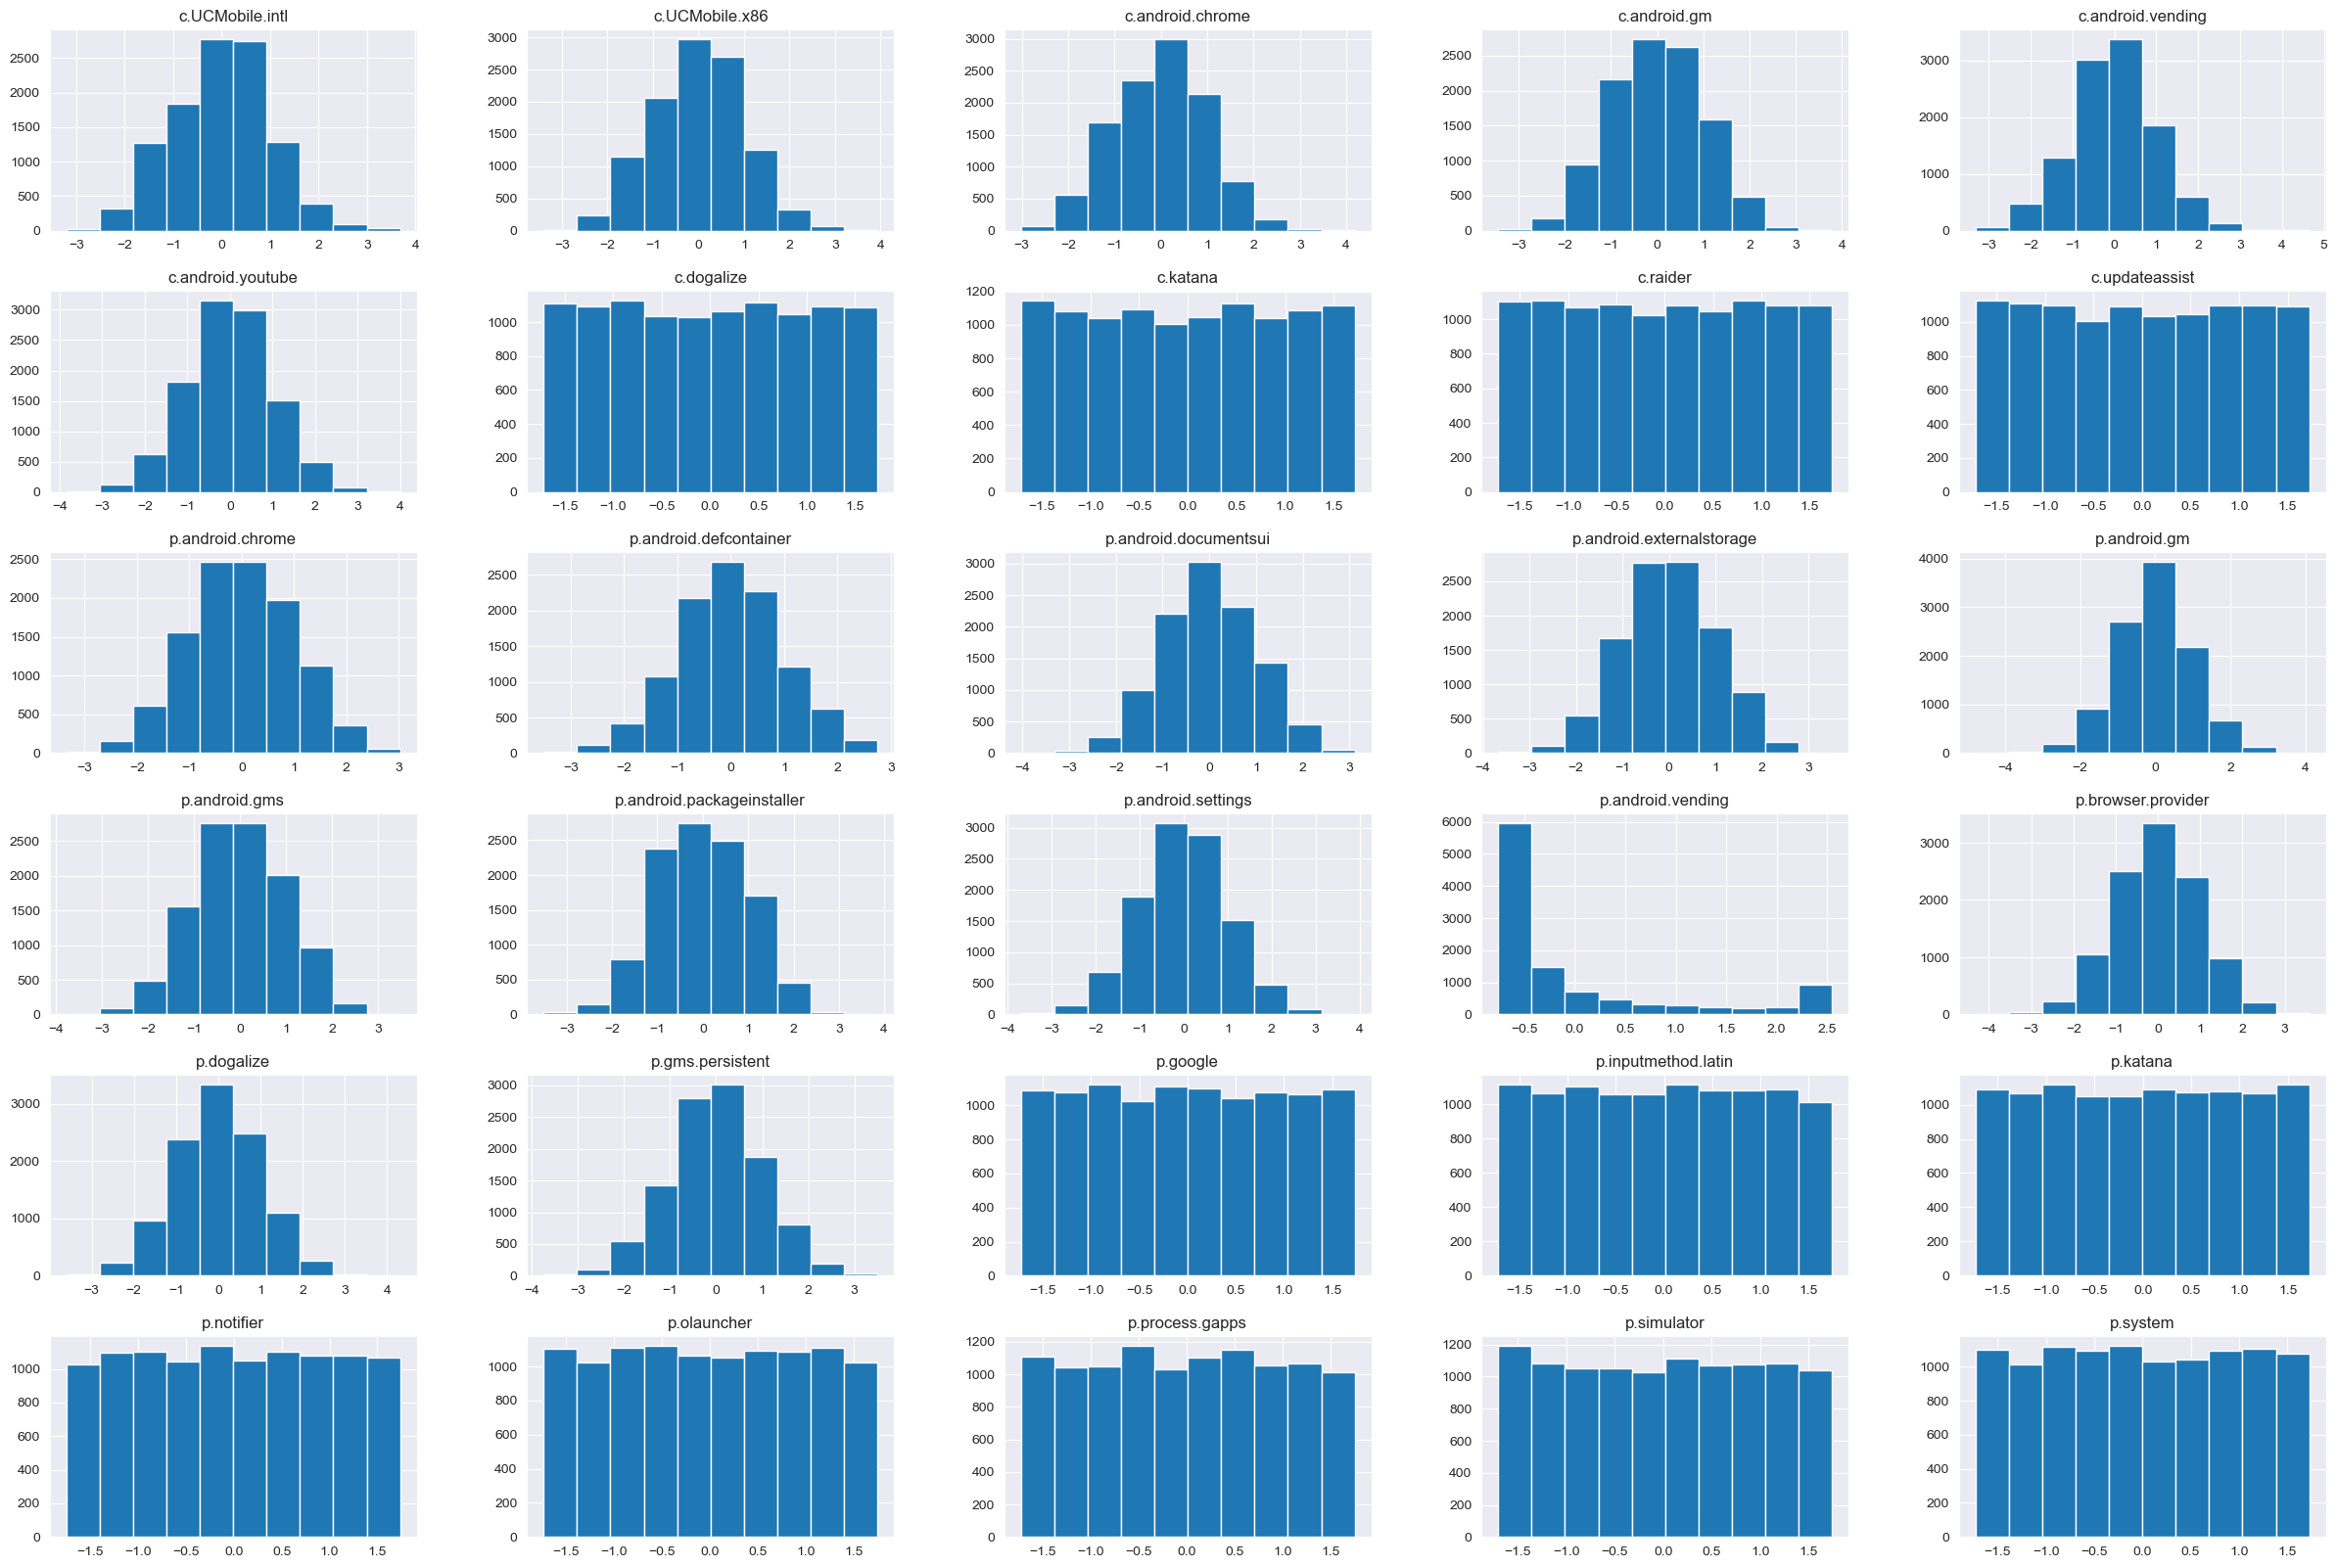

In [75]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(train_data)

columns = columns.difference(['mwra'])
train_data = DataFrame(train_data, columns=columns)

train_data.hist()

### 2.1 D



- **Data cleaning** - We checked the dataset for negative values, NaN values and duplicates. We removed the 'ts' and 'imei' columns that were not useful for further training.
- **Data Integration** - merged the connection and process datasets into one dataset. Also removed outliers using the standard deviation method.
- **Data Transformation** - Divided the dataset into training and test data. Binary encoding was used to encode the target column 'mwra'. Normalized and standardized the training data. And also removed values with low variance.
- **Making the data distribution more Gaussian** - I used PowerTransformer to make the data distribution more Gaussian.

These methods were chosen to clean, integrate, transform, and make the data distribution Gaussian because these methods are the most suitable in terms of the amount of data, the amount of outliers, and the internal characteristics. These methods help to improve the quality of the data and make it suitable for further training. 


## 2.2

### 2.2 A Which attributes (features) in your ML data are informative to the predicted variable

In our case, we will use several methods to select features attributes of different types:

- Filter
  1. Variance Threshold
  2. Chi-Squared

- Wrapper
  3. RFE
  4. Selection from the model

- Embedded 
  5. LASSO
  6. Elastic Net

Use global dictionary to record and store all attributes that will be selected by relatively different methods. Used for future comparing and analyzing.

In [76]:
selected_features_global = {}

#### Variance Threshold

Selected features: ['c.UCMobile.intl', 'c.UCMobile.x86', 'c.android.chrome', 'c.android.gm', 'c.android.vending', 'c.android.youtube', 'c.dogalize', 'c.katana', 'c.raider', 'c.updateassist', 'p.android.chrome', 'p.android.defcontainer', 'p.android.documentsui', 'p.android.externalstorage', 'p.android.gm', 'p.android.gms', 'p.android.packageinstaller', 'p.android.settings', 'p.android.vending', 'p.browser.provider', 'p.dogalize', 'p.gms.persistent', 'p.google', 'p.inputmethod.latin', 'p.katana', 'p.notifier', 'p.olauncher', 'p.process.gapps', 'p.simulator', 'p.system']


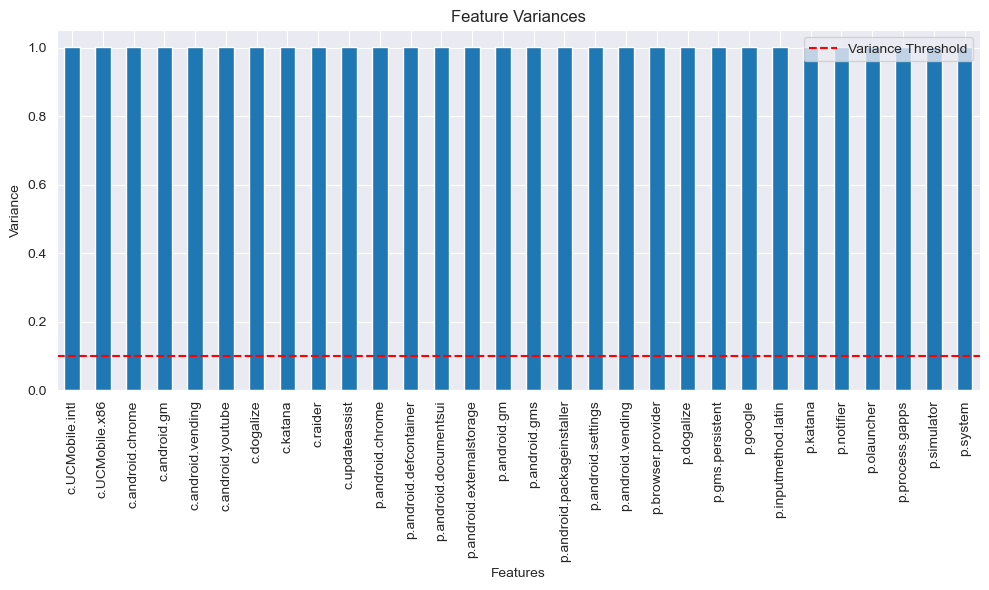

In [77]:
X = train_data
y = train_mwra

# The threshold parameter determines the variance cutoff
selector = VarianceThreshold(threshold=0.1)
X_variance = selector.fit_transform(X)

# Get the variances and feature names
variances = X.var()
selected_features = X.columns[selector.get_support(indices=True)]
selected_variances = variances[selector.get_support()]

print("Selected features:", selected_features.tolist())

# Plotting

plt.figure(figsize=(10, 6))
variances.plot(kind='bar')
plt.title('Feature Variances')
plt.ylabel('Variance')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.axhline(y=selector.threshold, color='r', linestyle='--', label='Variance Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [78]:
# Append selections to global selection
selected_features_global['Variance Threshold'] = selected_features.tolist()

#### Chi-Squared

                       Feature  Chi2 Score
18           p.android.vending  567.467119
10            p.android.chrome  152.147830
1               c.UCMobile.x86  127.896978
15               p.android.gms  124.396064
0              c.UCMobile.intl   49.162039
11      p.android.defcontainer   45.752250
2             c.android.chrome   42.683181
4            c.android.vending   34.320503
13   p.android.externalstorage   29.015391
12       p.android.documentsui   27.028758
8                     c.raider    0.621380
26                 p.olauncher    0.577286
27             p.process.gapps    0.439179
21            p.gms.persistent    0.210749
23         p.inputmethod.latin    0.148814
24                    p.katana    0.126158
22                    p.google    0.122866
6                   c.dogalize    0.084204
19          p.browser.provider    0.083635
7                     c.katana    0.050265
20                  p.dogalize    0.048359
28                 p.simulator    0.047711
16  p.andro

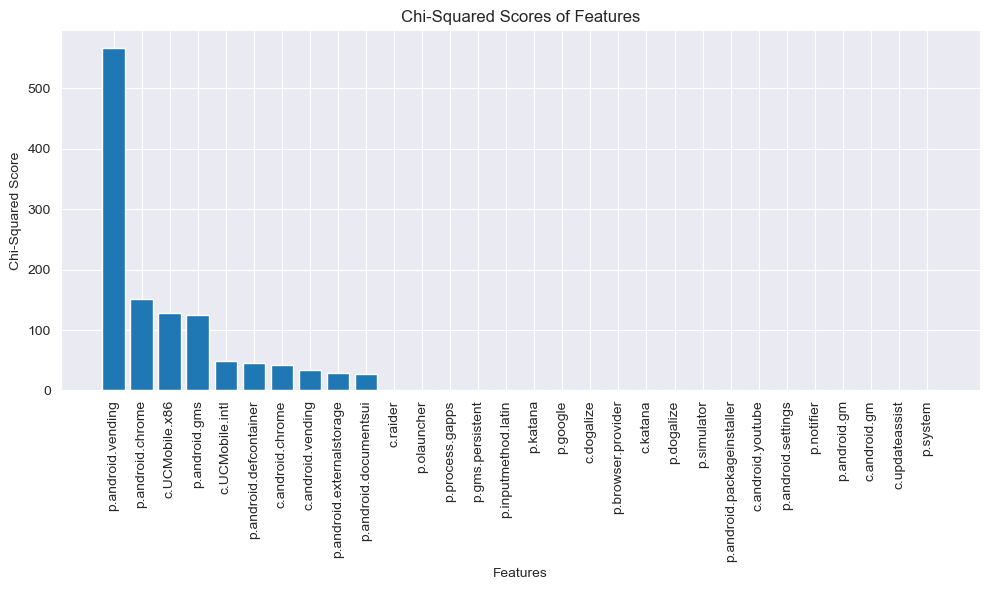

In [79]:
X = train_data
y = train_mwra

# Ensure all features are non-negative
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X)

# Apply SelectKBest with chi2
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_scaled, y)
scores = selector.scores_

# Create a DataFrame to display scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': scores})
feature_scores = feature_scores.sort_values(by='Chi2 Score', ascending=False)
print(feature_scores)

# Plotting

plt.figure(figsize=(10, 6))
plt.bar(feature_scores['Feature'], feature_scores['Chi2 Score'])
plt.title('Chi-Squared Scores of Features')
plt.ylabel('Chi-Squared Score')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [80]:
# Append selections to global selection
selected_features_global['Chi-Squared'] = X.columns[selector.get_support()].tolist()

#### Recursive Feature Elimination (RFE)

                       Feature  Ranking
1               c.UCMobile.x86        1
15               p.android.gms        1
13   p.android.externalstorage        1
12       p.android.documentsui        1
10            p.android.chrome        1
18           p.android.vending        2
0              c.UCMobile.intl        3
4            c.android.vending        3
14                p.android.gm        4
8                     c.raider        4
19          p.browser.provider        5
11      p.android.defcontainer        5
20                  p.dogalize        6
23         p.inputmethod.latin        6
3                 c.android.gm        7
16  p.android.packageinstaller        7
7                     c.katana        8
28                 p.simulator        8
27             p.process.gapps        9
21            p.gms.persistent        9
6                   c.dogalize       10
25                  p.notifier       10
24                    p.katana       11
29                    p.system       11


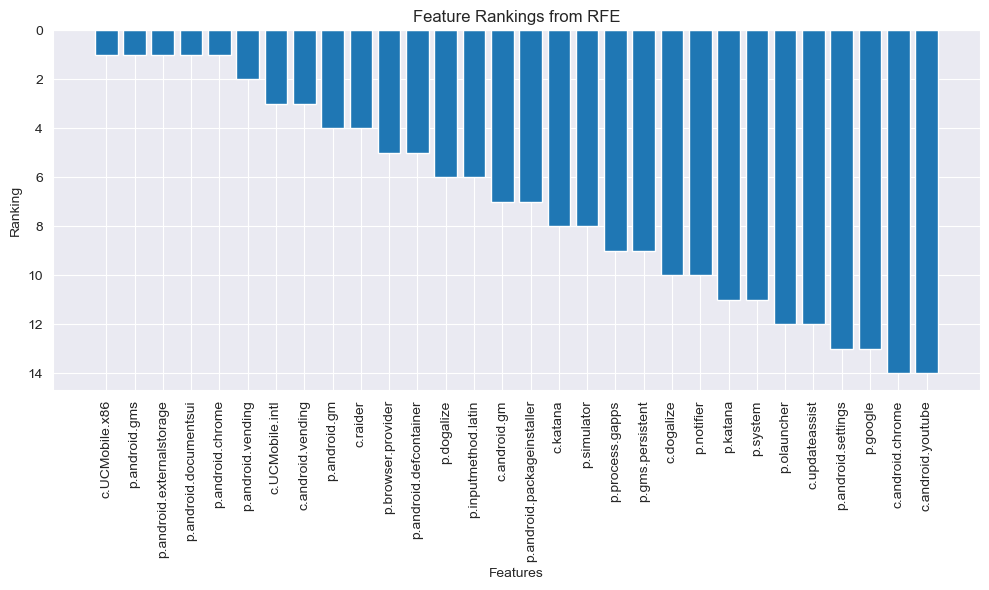

In [81]:
X = train_data
y = train_mwra

from sklearn.linear_model import LogisticRegression

# Initialize the estimator with iter = 5000
model = LogisticRegression(max_iter=5000, random_state=42)

# Initialize RFE
from sklearn.feature_selection import RFE

rfe = RFE(estimator=model, n_features_to_select=5, step=2)
rfe.fit(X, y)

# Get feature rankings
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
feature_ranking = feature_ranking.sort_values(by='Ranking')
print(feature_ranking)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(feature_ranking['Feature'], feature_ranking['Ranking'])
plt.title('Feature Rankings from RFE')
plt.ylabel('Ranking')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [82]:
# Append selections to global selection
selected_features_global['RFE'] = X.columns[rfe.get_support()].tolist()

#### Select From Model

Selected features: ['c.UCMobile.intl', 'c.UCMobile.x86', 'c.android.chrome', 'c.android.vending', 'p.android.chrome', 'p.android.defcontainer', 'p.android.documentsui', 'p.android.externalstorage', 'p.android.gms', 'p.android.vending']
                       Feature  Importance
1               c.UCMobile.x86    0.165390
15               p.android.gms    0.155771
10            p.android.chrome    0.130674
12       p.android.documentsui    0.050085
4            c.android.vending    0.043830
13   p.android.externalstorage    0.042462
0              c.UCMobile.intl    0.040789
11      p.android.defcontainer    0.039756
18           p.android.vending    0.039472
2             c.android.chrome    0.033698
3                 c.android.gm    0.024312
16  p.android.packageinstaller    0.021923
14                p.android.gm    0.016076
8                     c.raider    0.013216
6                   c.dogalize    0.012283
28                 p.simulator    0.012121
20                  p.dogalize   

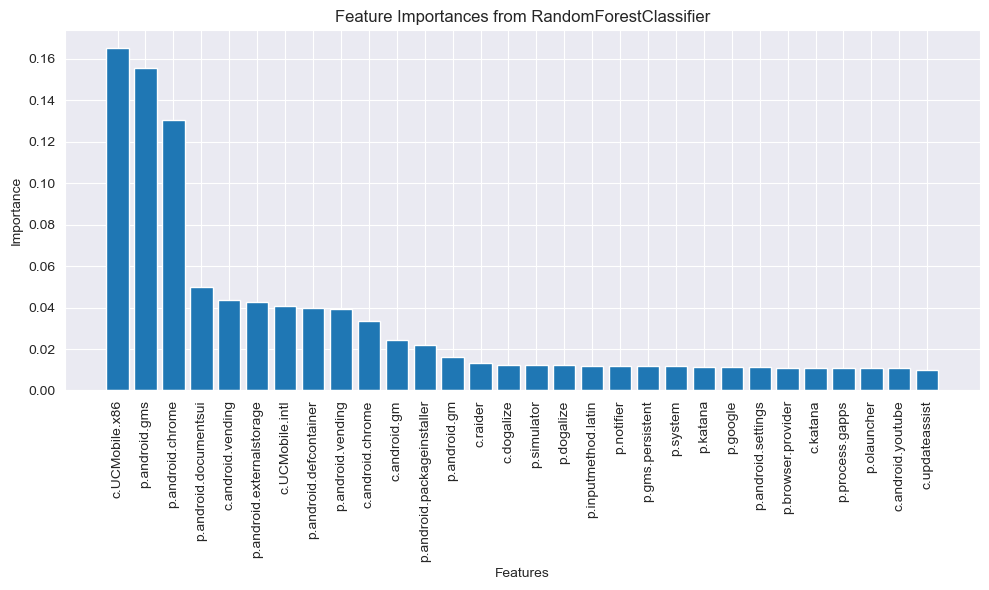

In [83]:
X = train_data
y = train_mwra

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(estimator=model)
selector.fit(X, y)

# Get selected features
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())
importances = selector.estimator_.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importances from RandomForestClassifier')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [84]:
# Append selections to global selection
selected_features_global['Select from model'] = selected_features.tolist()

#### LASSO (Least Absolute Shrinkage and Selection Operator)

Selected features: ['c.UCMobile.x86', 'p.android.chrome', 'p.android.gms', 'p.android.vending']
Selected features:                        Feature  Coefficient
1               c.UCMobile.x86     0.105889
15               p.android.gms    -0.099410
10            p.android.chrome    -0.075177
18           p.android.vending    -0.000234
16  p.android.packageinstaller     0.000000
28                 p.simulator    -0.000000
27             p.process.gapps    -0.000000
26                 p.olauncher    -0.000000
25                  p.notifier     0.000000
24                    p.katana    -0.000000
23         p.inputmethod.latin     0.000000
22                    p.google    -0.000000
21            p.gms.persistent    -0.000000
20                  p.dogalize    -0.000000
19          p.browser.provider     0.000000
17          p.android.settings    -0.000000
0              c.UCMobile.intl    -0.000000
14                p.android.gm     0.000000
13   p.android.externalstorage     0.000000
12   

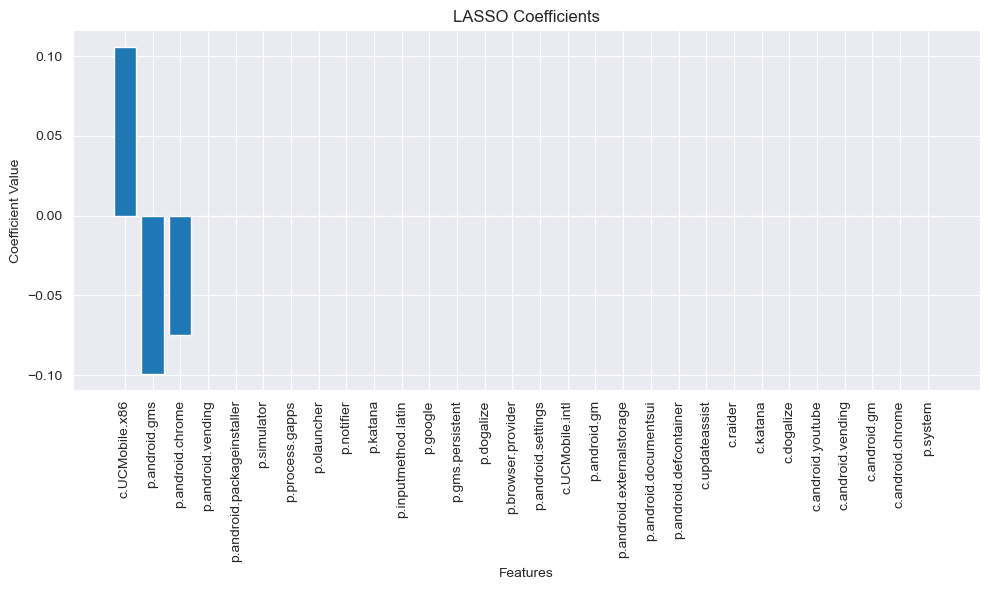

In [85]:
X = train_data
y = train_mwra

# Standardize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize LASSO
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_scaled, y)

# Use SelectFromModel to select features
selector = SelectFromModel(lasso, prefit=True)
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())
coefficients = lasso.coef_

feature_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_coefficients = feature_coefficients.sort_values(by='Coefficient', key=abs, ascending=False)
print("Selected features:", feature_coefficients)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(feature_coefficients['Feature'], feature_coefficients['Coefficient'])
plt.title('LASSO Coefficients')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [86]:
# Append selections to global selection
selected_features_global['LASSO'] = X.columns[selector.get_support()].tolist()

#### Elastic Net

Selected features: ['c.UCMobile.intl', 'c.UCMobile.x86', 'p.android.chrome', 'p.android.externalstorage', 'p.android.gms', 'p.android.vending']
                       Feature  Coefficient
1               c.UCMobile.x86     0.133217
15               p.android.gms    -0.101168
10            p.android.chrome    -0.087736
18           p.android.vending    -0.033109
0              c.UCMobile.intl    -0.022154
13   p.android.externalstorage     0.018027
12       p.android.documentsui     0.008139
4            c.android.vending     0.007296
5            c.android.youtube     0.000000
19          p.browser.provider     0.000000
28                 p.simulator    -0.000000
27             p.process.gapps    -0.000000
26                 p.olauncher    -0.000000
25                  p.notifier     0.000000
24                    p.katana    -0.000000
23         p.inputmethod.latin     0.000000
22                    p.google    -0.000000
21            p.gms.persistent    -0.000000
20                  

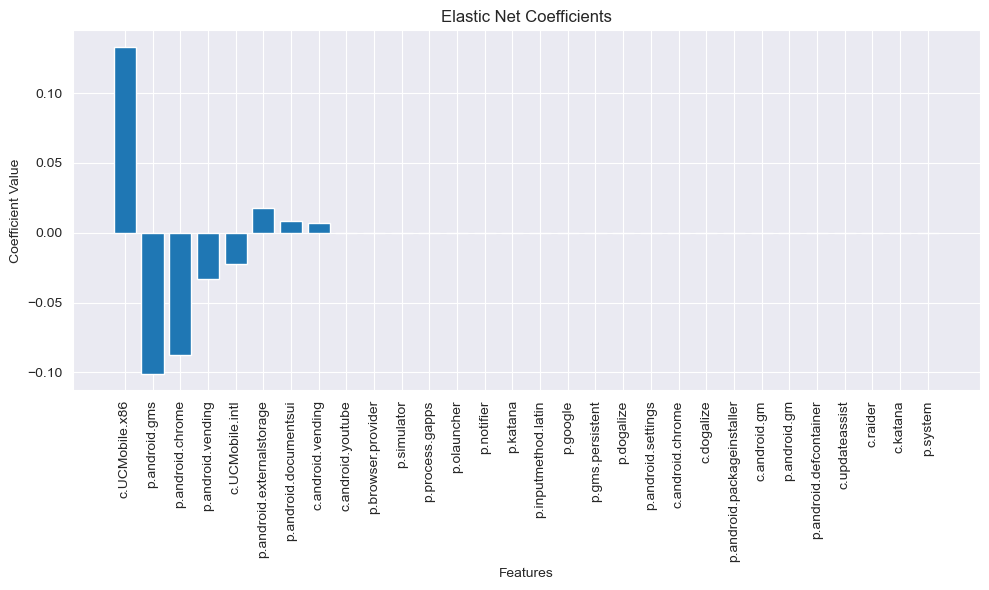

In [87]:
X = train_data
y = train_mwra

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize ElasticNet
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_scaled, y)

# Use SelectFromModel to select features
selector = SelectFromModel(elastic_net, prefit=True)
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())
coefficients = elastic_net.coef_

feature_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_coefficients = feature_coefficients.sort_values(by='Coefficient', key=abs, ascending=False)
print(feature_coefficients)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(feature_coefficients['Feature'], feature_coefficients['Coefficient'])
plt.title('Elastic Net Coefficients')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [88]:
# Append selections to global selection
selected_features_global['Elastic Net'] = X.columns[selector.get_support()].tolist()

#### Analyze

Let us convert our `selected_features_global` dictionary to a Dataframe for further manipulation for analysis:

In [89]:
all_selected_features = set()
for features in selected_features_global.values():
    all_selected_features.update(features)
all_selected_features = sorted(all_selected_features)

summary_df = pd.DataFrame(index=all_selected_features)

# 0/1 – non/- selected
for method, features in selected_features_global.items():
    summary_df[method] = summary_df.index.isin(features).astype(int)

print(summary_df)

                            Variance Threshold  Chi-Squared  RFE  \
c.UCMobile.intl                              1            1    0   
c.UCMobile.x86                               1            1    1   
c.android.chrome                             1            1    0   
c.android.gm                                 1            1    0   
c.android.vending                            1            1    0   
c.android.youtube                            1            1    0   
c.dogalize                                   1            1    0   
c.katana                                     1            1    0   
c.raider                                     1            1    0   
c.updateassist                               1            1    0   
p.android.chrome                             1            1    1   
p.android.defcontainer                       1            1    0   
p.android.documentsui                        1            1    1   
p.android.externalstorage                    1  

Let us plot those values for better visualization and comparing:

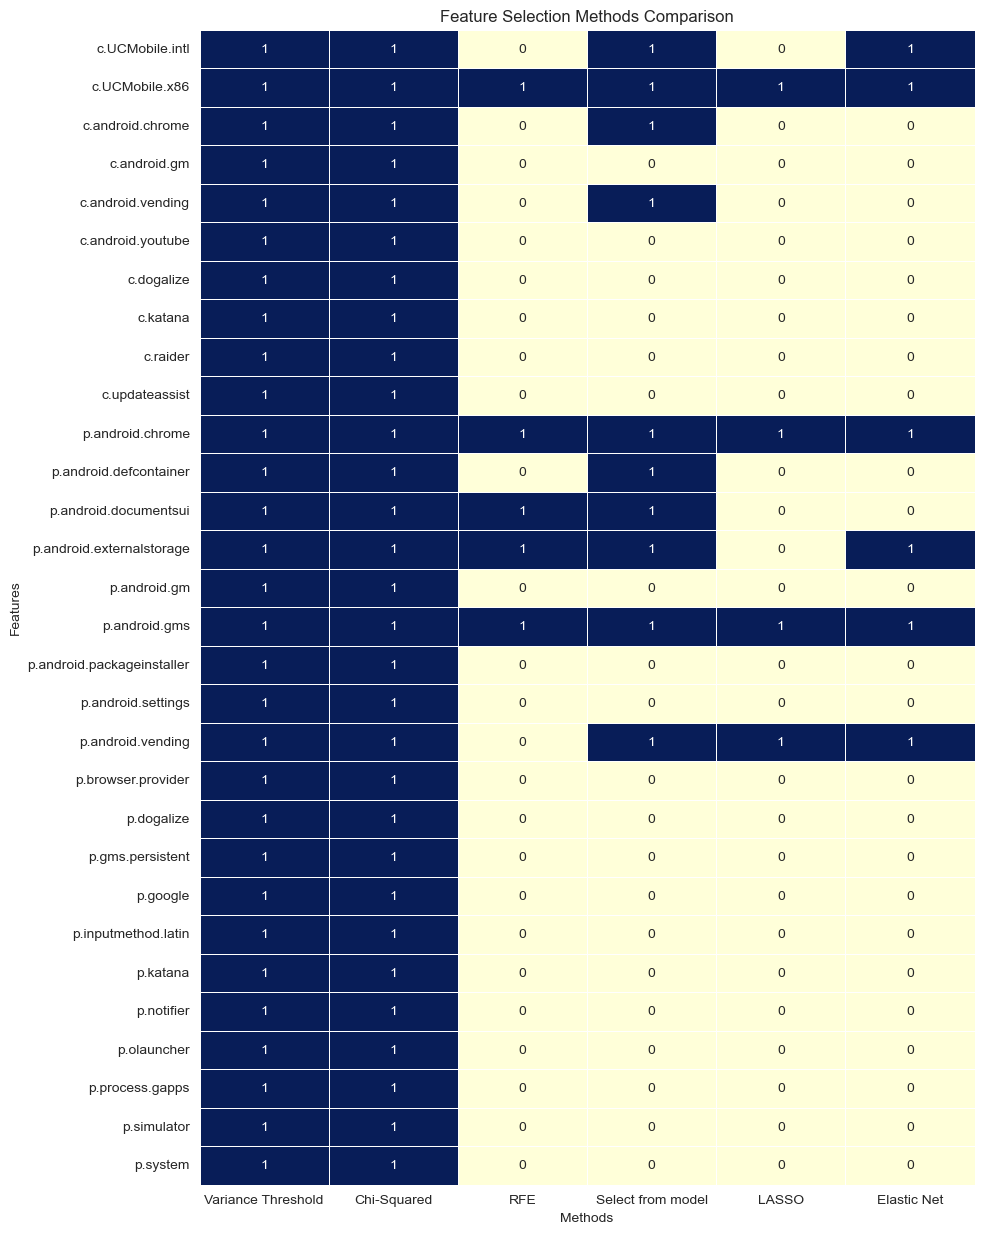

In [90]:
plt.figure(figsize=(10, len(summary_df) * 0.5))
sns.heatmap(summary_df, annot=True, cbar=False, cmap='YlGnBu', linewidths=0.5)
plt.title('Feature Selection Methods Comparison')
plt.ylabel('Features')
plt.xlabel('Methods')
plt.show()

In terms of our outcomes, it is noticeable that our features were identified consistently by all approaches, except for the RFE method with `LogisticRegression`, which omitted `c.katana` and `p.android.gm` but incorporated `p.olauncher`, therefore, we will designate that attribute as a selected feature as a precautionary measure.

### 2.2 B Ordering features

To ensure accurate sorting, we will use pre-existing outcomes from methods such as "Random Forest Classifier" (Select From Model), LASSO, Elastic Net, which already indicate the significance of each attribute:

In [91]:
##### Random Forest Classifier (Select From Model)

#                       Feature  Ranking
#1                   c.dogalize        1
#18                 p.olauncher        1
#15       p.android.documentsui        1
#13            p.android.chrome        1
#10                    p.system        1
#12          p.android.settings        2
#0                     c.katana        3
#11                p.android.gm        3

##### LASSO

#Selected features:     Feature  Coefficient
#1                   c.dogalize     0.108174
#15       p.android.documentsui    -0.096616
#10                    p.system    -0.077808

##### Elastic Net

#                       Feature  Coefficient
#1                   c.dogalize     0.134673
#15       p.android.documentsui    -0.102186
#10                    p.system    -0.093340
#13            p.android.chrome     0.020050
#0                     c.katana    -0.019775
#11                p.android.gm    -0.019196
#12          p.android.settings     0.010683
#4                 c.android.gm     0.002864

Regarding these values, we can definitely say that `c.dogalize` will come at the first place.
And next attributes we will order also based on those values:

##### Order 

1. `c.dogalize`
2. `p.android.documentsui`
3. `p.system`
4. `p.android.chrome`
5. `p.olauncher`
6. `c.katana`
7. `p.android.gm`

### 2.2 C Why that choice?

We had selected those methods based on next statements:
- Diversity of Techniques
    - These methods span a range of feature selection approaches, including filter (Variance Threshold, Chi-Squared), wrapper (RFE, Select From Model), and embedded methods (LASSO, Elastic Net).
- Comprehensive Analysis
    - Using different methods helps capture various perspectives on feature importance and allows for comparison to ensure that selected features are robust and meaningful.
- Interpretability
    - Methods like LASSO and Elastic Net (and Random Forest Tree) provide easy interpretation of which features are important due to their coefficients, while methods like Chi-squared and RFE give a statistical and iterative view of feature relevance.
- Model Compatibility
    - These methods are versatile and can be used with different types of models, from linear to complex tree-based models, ensuring applicability across various machine learning pipelines.

In [92]:
train_data.head

<bound method NDFrame.head of        c.UCMobile.intl  c.UCMobile.x86  c.android.chrome  c.android.gm  \
0             1.861333       -0.271976         -0.689173     -1.687671   
1             0.698843        0.411998          0.545003      0.883349   
2            -0.405478        0.585375         -0.597016     -0.897338   
3             0.240303        0.243003          0.626476      0.696930   
4            -1.114019        0.274435         -1.194561     -1.396384   
...                ...             ...               ...           ...   
10786         1.502022       -0.183213         -0.002916     -0.778681   
10787        -1.330566       -0.628752          1.550948     -0.176460   
10788        -0.833918       -0.065965         -0.258662     -1.921743   
10789        -1.152702        0.460810         -0.438407     -0.880482   
10790        -0.960228        0.810166         -0.971205     -0.713260   

       c.android.vending  c.android.youtube  c.dogalize  c.katana  c.raider  \
0 

## 2.3

In [93]:
from sklearn.pipeline import Pipeline

In [94]:
train_data, test_data, train_mwra, test_mwra = train_test_split(data, mwra, test_size=0.3, random_state=42)

In [102]:
from sklearn.preprocessing import FunctionTransformer
from sklearn import pipeline

pipelane = Pipeline([
    ('encoding', FunctionTransformer(binary_encoding)),
    ('normalizer', FunctionTransformer(normalization)),
    ('standartezer', FunctionTransformer(standardization)),
    ('power_transformer', PowerTransformer(method='yeo-johnson')),
    ('robust_scaler', VarianceThreshold(threshold=0.1)),
    ('feature_selection', SelectKBest(score_func=chi2, k='all')),
    ('model', RandomForestClassifier(random_state=42))
])

pipelane.fit(train_data, train_mwra)

ValueError: X does not contain the columns listed in cols

In [ ]:
train_data.to_csv('train_data.csv', index=False)
train_mwra.to_csv('train_mrwa.csv', index=False)
test_data.to_csv('test_data.csv', index=False)
test_mwra.to_csv('test_mrwa.csv', index=False)

accuracy = pipeline.score(test_data, test_mwra)
print(f"Accuracy: {accuracy}")